# 3D Motion Model

In [1]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
from pylab import figure
import numpy as np
%matplotlib notebook

In [2]:
# P is a point in space
P = np.array([0.5,0,3])
P_txt = "(X,Y,Z)"

f = 2
screenHight = 1
screenWidth = 1

<IPython.core.display.Javascript object>


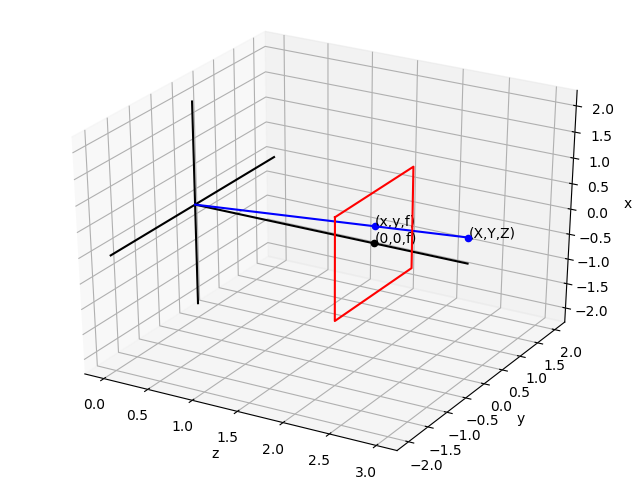

In [3]:
# initialize plot:
axLim = 2
fig = figure()
ax = Axes3D(fig)
# data:
ax.scatter(P[2],P[1],P[0],color='b') 
# plot text:
ax.text(P[2],P[1],P[0],P_txt, size=10, zorder=1, color='k') 
ax.text(f,f*P[1]/P[2],f*P[0]/P[2],"(x,y,f)", size=10, zorder=1, color='k') 
ax.text(f,0,0,"(0,0,f)", size=10, zorder=1, color='k') 
ax.set_xlabel('z')
ax.set_ylabel('y')
ax.set_zlabel('x')
# plot axis:
ax.plot((0,P[2]),(0,0),(0,0), color='k')
ax.plot((0,0),(-axLim,axLim),(0,0), color='k')
ax.plot((0,0),(0,0),(-axLim,axLim), color='k')
# plot lines
ax.plot((P[2],0),(P[1],0),(P[0],0), color='b')
ax.plot((f,f,f,f,f),(-screenWidth,screenWidth,screenWidth,-screenWidth,-screenWidth),
        (screenHight,screenHight,-screenHight,-screenHight,screenHight),color='r')
ax.scatter(f,f*P[1]/P[2],f*P[0]/P[2],color='b') 
ax.scatter(f,0,0,color='k') 

pyplot.show()

## Projection Calculation

$\theta$, the angle between the blue line and z axis can be calculated by:  ${\theta = 2 \tan^{-1}(\frac{1}{f})}$, and the focal length $f$ can be calculated using $\theta$ : ${f^{-1}=\tan(\frac{\theta}{2})}$.

The point (X,Y,Z) in space is projected on the screen (e.g. camera screen) to ${(x,y,f)}$. Given the values ${(X,Y,Z)}$ and the focal length $f$, x,y can be calculated by:
${x=f\frac{X}{Z} ; y=f\frac{Y}{Z}}$

To aquire the $\tilde x$ (projection on the screen), we can use the 4-vector  ${P=(X,Y,Z,1)}$ and write:

\begin{equation}
\tilde x
\sim
\begin{pmatrix}
{f} \  {0} \ {0} \ {0}\\
{0} \  {f} \ {0} \ {0}\\
{0} \  {0} \ {1} \ {0}
\end{pmatrix}
P
=
[K|0]P
=
\begin{pmatrix}
fX\\fY\\Z
\end{pmatrix}
\end{equation}

After scaling the vector (deviding by Z), we get: 
${x=
\begin{pmatrix}
f \frac{X}{Z} \\f \frac{Y}{Z} \\1
\end{pmatrix}}$
.

To store the depth information, we can use the 4X4 matrix:

\begin{equation}
\tilde x
\sim
\begin{pmatrix}
{f} \  {0} \ {0} \ {0}\\
{0} \  {f} \ {0} \ {0}\\
{0} \  {0} \ {1} \ {0}\\
{0} \  {0} \ {0} \ {1}
\end{pmatrix}
P
=
\begin{pmatrix}
fX\\fY\\Z\\1
\end{pmatrix}
\end{equation}

And get after scaling: 
${x=
\begin{pmatrix}
f \frac{X}{Z} \\f \frac{Y}{Z} \\1\\d
\end{pmatrix}}$

when ${d=\frac{1}{Z}}$ have depth information.


## Several Cameras

When there are two cameras we have to take care of their positions and angle.

<IPython.core.display.Javascript object>


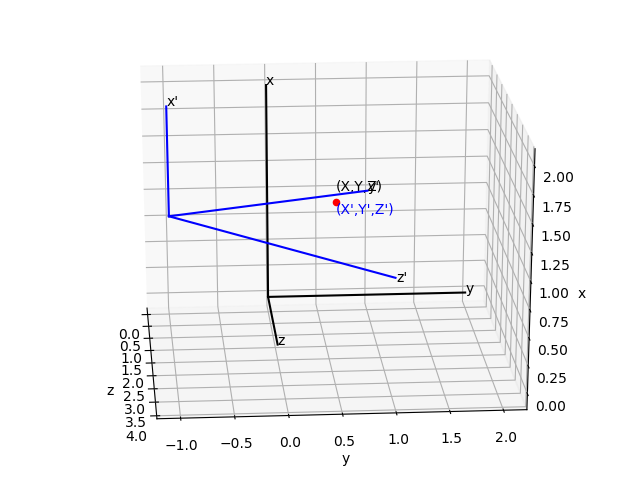

In [4]:
# data
P = np.array([1.5,0.5,3])
P_txt1 = "(X,Y,Z)"
P_txt2 = "(X',Y',Z')"

# initialize plot:
axLim = 2
fig = figure()
ax = Axes3D(fig)

# plot piont:
ax.scatter(P[2],P[1],P[0],color='r') 
ax.text(P[2],P[1],P[0]+0.1,P_txt1, size=10, zorder=1, color='k') 
ax.text(P[2],P[1],P[0]-0.1,P_txt2, size=10, zorder=1, color='b') 
ax.set_xlabel('z')
ax.set_ylabel('y')
ax.set_zlabel('x')

# plot axis:
# original set
ax.plot((0,axLim),(0,0),(0,0), color='k')
ax.plot((0,0),(0,axLim),(0,0), color='k')
ax.plot((0,0),(0,0),(0,axLim), color='k')
ax.text(0,2,0,"y", size=10, zorder=1, color='k') 
ax.text(2,0,0,"z", size=10, zorder=1, color='k') 
ax.text(0,0,2,"x", size=10, zorder=1, color='k') 
# second set
ax.plot((1,1+np.sqrt(8)),(-1,1),(1,1), color='b') # z' axis
ax.plot((1,0),(-1,1),(1,1), color='b')  # y' axis
ax.plot((1,1),(-1,-1),(1,2), color='b') # x' axis
ax.text(0,1,1,"y'", size=10, zorder=1, color='k') 
ax.text(4,1,1,"z'", size=10, zorder=1, color='k') 
ax.text(1,-1,2,"x'", size=10, zorder=1, color='k') 

pyplot.show()

In this situation the position of the camera is not on $(0,0,0)$ of the original axis $(x,y,z)$, but in the origin of the second axises set, $(x',y',z')$. To find where the point is projected in the camera we have first represent the point $(X,Y,Z)$ in the second frame of reference, $(X',Y',Z')$.
The transform is:

\begin{equation}
\vec{X'} = 
\begin{pmatrix}
X'\\Y'\\Z'\\1
\end{pmatrix}
=
\begin{pmatrix}
\mathbf{R} \ \vec{t}\\
\vec{0} \ {1}
\end{pmatrix}
\begin{pmatrix}
X\\Y\\Z\\1
\end{pmatrix}
=
\mathbf{E_1}\vec{X}
\end{equation}

After that, to find the projection in the cameca screen we have to do like before:
\begin{equation}
\vec{\tilde X} \sim \mathbf{P_1} \mathbf{E_1} \vec{X}
\end{equation}



Recall that 
${\vec{\tilde{X}} = \begin{pmatrix} x'\\y'\\1\\d \end{pmatrix} = \begin{pmatrix} f\frac{X}{Z}\\f\frac{Y}{Z}\\1\\d \end{pmatrix} }$, 
having $d$ value we have $Z$ value (${d=1/Z}$), and can return to: 
${Z \begin{pmatrix} x'\\y'\\1\\d \end{pmatrix} = \begin{pmatrix} fX\\fY\\Z\\1 \end{pmatrix} }$ 
and find the original point $(X,Y,Z)$

Using all this information, we can project the point into anoter image taken from second camera:

\begin{equation}
\vec{\tilde X_2} \sim \mathbf{P_2} \mathbf{E_2} \vec{X} = \mathbf{P_2} \mathbf{E_2} \mathbf{E_1^{-1}} \mathbf{P_1^{-1}} \vec{\tilde X_1} = \mathbf{M_{21}} \vec{\tilde X_1}
\end{equation} 

The meaning of that is that using one matrix $\mathbf{M_{21}}$ we can know exactly where each pixel in first image will be projected into the second camera.